# Praktische vragen Deep Learning

Sabine De Vreese, Stijn Lievens en Simon De Gheselle

24 september 2025

## 1  Classification of the Iris dataset with a MLP
In this exercise, we will build a small very simple MLP to classify irises into 3 dif-ferent species based on 4 measurements. We will keep this exercise very simple.Some things donotrepresent best practices

### 1.1  Load the Data
The iris dataset is built-in into `sklearn.datasets`. We use `return_X_y=True` to get a numpy array with the features, and a numpy array with the targets.Check the shape of these arrays. They should be `(150, 4)` and `(150, )`.
```python
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
```

In [316]:
from sklearn.datasets import load_iris
X,y = load_iris(return_X_y=True)
X.shape, y.shape
print("Aantal klassen: ", str(set(y)))


Aantal klassen:  {0, 1, 2}


### 1.2  Build a MLP
We want to build an MLP consisting of:
- An input layer with the correct number of neurons. The name of the layer is input. How many neurons do we need in the input layer?

    Iris shape (150, 4), 150 rijen en 4 features. Dit betekent dat je 4 neuronen nodig hebt.
    $\rightarrow$ wat betekent `keras.Input(input_shape=(4,))`, wat betekent ik verwacht een rij met vier getallen.
- One hidden layer with 5 neurons using the ReLU activation function. The name of the layer is hidden.
- One output layer with the correct number of neurons and the correct activation function for a classification problem. The name of the layer is output.
Follow the steps below:

1. Take a look at the examples on https://keras.io/api/models/sequential/.
2. An example on how to pass the activation function via the string identifier:https://keras.io/api/layers/activations/.
3. Write similar code to create the model.
4. Very often, it is convenient if we can easily recreate a model using a small function `get_model`. Rewrite the previous code to a small function `get_model` that returns the model as described above. Take a look at https://keras.io/api/models/model/#with-the-sequential-class to see an example.
5. Create the model using the function `get_model`.
6. Use the summary method of the model to verify that your model has 43 parameters.
7. Convince yourself that you understand where this number comes from! Making a simple sketch of the model can be useful

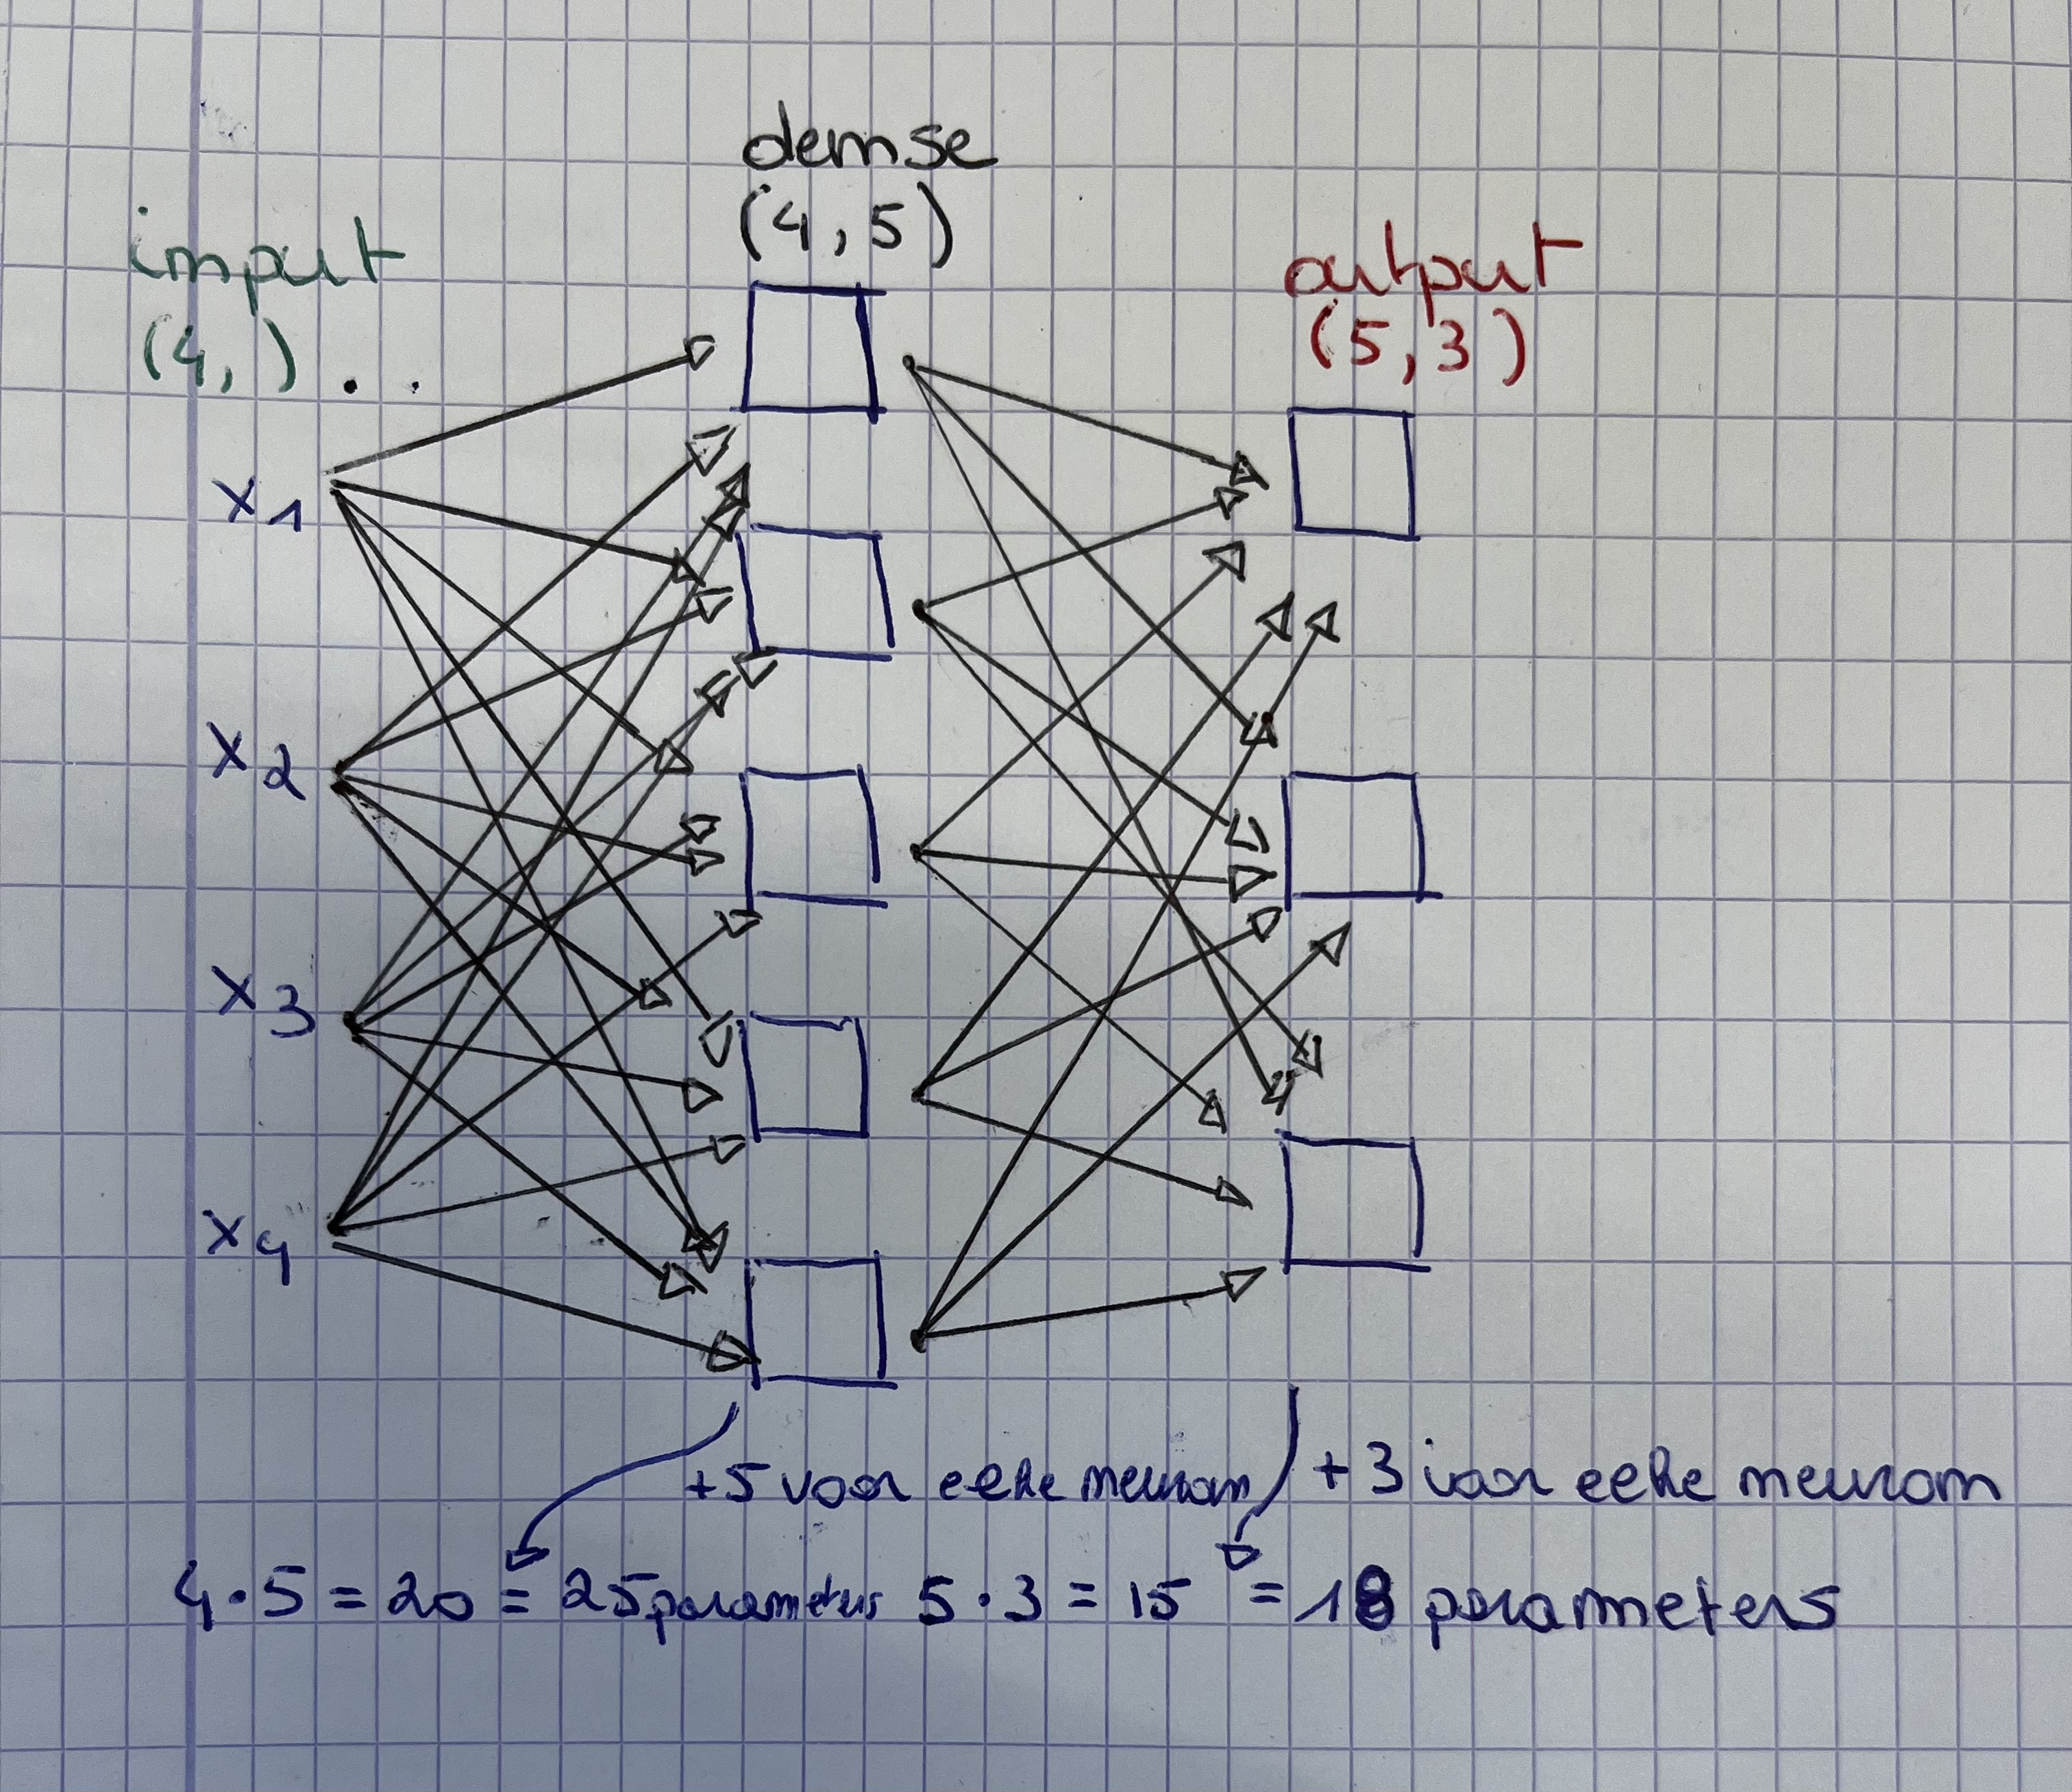

In [317]:
import keras
from keras import layers
from keras import ops

def get_model(input_shape):
    m = keras.Sequential([
        #* Input: (4,) -> Verwacht 4 features
        keras.Input(shape=input_shape, name="input"),
        #* Hidden: (4 inputs * 5 neurons) -> Gewicht-matrix shape: (4, 5)
        #! Parameters: (4 * 5) gewichten + 5 bias = 25 parameters
        #! Voor elke 5 neuronen, elk zijn eigen bias. Daarom 5 bias.
        keras.layers.Dense(units=5, name="hidden", activation="relu"),
        #* Output: (5 inputs * 3 neurons) -> Gewicht-matrix shape: (5, 3)
        #! Parameters: (5 * 3) gewichten + 3 bias = 18 parameters
        keras.layers.Dense(units=3, name="output", activation="softmax"),
    ])
    return m

model = get_model((4,))
model.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden (Dense)                  │ (None, 5)              │            25 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 3)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43 (172.00 B)

 Trainable params: 43 (172.00 B)

 Non-trainable params: 0 (0.00 B)

### 1.3  Compile the Model 
Compile the model with the following options (example on https://keras.io/api/models/model_training_apis/):
- Use stochastic gradient descent with all the default parameters as the optimizer.
- Specify the correct loss for a multi-class classification problem, where each instance belongs to exactly one class. Take into account the shape of the targets above which is `(150, )`
- Track the accuracy metric.

In [318]:
from keras import optimizers
from keras import losses

model.compile(
    optimizer=optimizers.SGD(),
    #! Sparse wordt gebruikt omdat we GEEN one-hot encoded
    #! labels hebben, maar [0,1,2]
    loss=losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

### 1.4  Train the Model
Train the model for 20 epochs (example on https://keras.io/api/models/model_training_apis/). Because we have such a small dataset we will use a batch size of 8 so that we have a reasonable number of updates per epoch.

Note: since we are not using any validation data we have no way of knowing whether the model is overfitting or not. Don’t do this in practice!

In [319]:
model.fit(
    x=X,
    y=y,
    verbose="auto",
    epochs=20,
    batch_size=8
)

Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3733 - loss: 1.0992
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5267 - loss: 0.8891
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5533 - loss: 0.7643
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6067 - loss: 0.6909
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6267 - loss: 0.6456
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6600 - loss: 0.6007
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6933 - loss: 0.5750
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6667 - loss: 0.5521
Epoch 9/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6800 - loss: 0.5328
Epoch 10/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7600 - loss: 0.5101
Epoch 11/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7267 - loss: 0.4935
Epoch 12/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8067 - lo

### 1.5  Emulate the Calculations of the Model
This step is not necessary in practice. We include it here for a better understanding of what is going on.First, compute the result of the model (the MLP) on a small batch.

1. Create a tensor called `X_batch` which consists of the first two training examples. Use the slice operator. What is the shape of this tensor?

In [320]:
X_batch = X[:2]
print("Shape X_batch", X_batch.shape)
X_batch

Shape X_batch (2, 4)


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2]])

2. Call the model with `X_batch` as the input. Call the result `y_batch_pred`. What is the shape of this tensor? What does each dimension mean?

In [321]:
y_batch_pred = model(X_batch)
y_batch_pred.shape
#* (2, 3) -> 2 rijen of samples (voorbeelden)
#* met 3 waarden van elk output-neuron (softmax).

TensorShape([2, 3])

3. Use a function of `keras.ops` to verify that the sum of each row is equal to one.

In [322]:
sum_each_row = keras.ops.sum(y_batch_pred,axis=1)
print(sum_each_row)

keras.ops.equal(sum_each_row, 1)

tf.Tensor([0.9999999 1.       ], shape=(2,), dtype=float32)


<tf.Tensor: shape=(2,), dtype=bool, numpy=array([False,  True])>

Now, emulate these calculations “by hand” and verify that you get the sameresults.

1. First, extract the weights of the hidden layer and store them asW1andb1
```python 
# assume "model" is the name assigned to the MLP
W1, b1 = model.get_layer("hidden").get_weights()
```

In [323]:
W1, b1 = model.get_layer("hidden").get_weights()
print("Gewichten hidden laag:\n", W1)
print("Bias hidden laag:\n", b1)

Gewichten hidden laag:
 [[-0.39007196  0.13150452  0.22459471  0.85969776  0.39781308]
 [ 0.39190966  1.0188739   0.3775692  -0.5035752   0.45489183]
 [ 1.1777401  -0.7210704  -0.5721896  -0.7751656  -0.25321162]
 [-0.35569355  0.5461984  -0.60754323  0.16711417  0.30583343]]
Bias hidden laag:
 [-0.05994866  0.08173424  0.01985287  0.024927   -0.02405865]


2. Do the same for the weights of the output layer.

In [324]:
W2, b2 = model.get_layer("output").get_weights()
print("Gewichten output laag:\n", W2)
print("Bias output laag:\n", b2)

Gewichten output laag:
 [[-0.77704877  0.7254733   0.7380667 ]
 [ 0.7731036   0.15663007 -0.4125354 ]
 [ 0.6830466   0.4563097  -0.07790132]
 [ 0.9632709   0.5184628   0.31975275]
 [ 0.6406485   0.20381011  0.30442768]]
Bias output laag:
 [ 0.05634617  0.0876449  -0.14399111]


3. Verify the shape of these 4 tensors. Make sure that you understand these.
```python
* Hidden laag
    Gewichten hidden laag -> 4 rijen komen overeen met aantal inputs (elk waarde een weight voor x -> neuron), 
    waarbij 5 overeen komt met aantal neuronen.
    [[-0.11312031  0.5100475   0.08008134  0.6569755  -0.67086554]
    [-0.02648934  0.6916442   0.00639296  0.6191452  -0.06912911]
    [ 0.6786261  -0.7544281   0.59368646  0.01914029  0.5738019 ]
    [ 0.52967197 -0.46332678 -0.49657786  0.08717977  0.06717038]]

    Bias hidden laag -> Hier heb je 5 bias-waarden, 
    die overeen komen met aantal neuronen
    [-0.01496706  0.10485744 -0.06436228  0.01306782  0.        ]

* Output laag
    Gewichten output laag -> 5 rijen komen overeen met inputs voor de output laag, 
    waarbij 3 overeen komt met aantal neuronen.
    [[-0.12823285  0.5906584   1.0942428 ]
    [ 1.0788529   0.6065852  -0.54330796]
    [-0.48500973 -0.36500064  0.42732397]
    [-0.15634374  0.2558853  -0.2982134 ]
    [-1.1020237   0.06296571 -0.4976078 ]]

    Bias output laag -> Hier zijn 3 bias-waarden die overeen komen met aantal neuronen.
    [ 0.04348855  0.03193799 -0.07542659]
 ```


4. Complete the following code, using only methods from `keras.ops`, https://keras.io/api/ops/

In [325]:
z1 = keras.ops.matmul(X_batch, W1) + b1
a1 = ops.relu(z1) # apply relu to z1
a1

<tf.Tensor: shape=(2, 5), dtype=float64, numpy=
array([[0.90006559, 3.41820716, 1.56420397, 1.59506332, 3.30357989],
       [0.78212515, 2.88246929, 1.33050043, 1.67491137, 2.99657136]])>

In [326]:
z2 = keras.ops.matmul(a1, W2) + b2 # linear transformation of output layer
y_batch_pred_2 = keras.activations.softmax(z2) # apply appropriate activation function to z2
y_batch_pred_2

<tf.Tensor: shape=(2, 3), dtype=float64, numpy=
array([[0.96013601, 0.03794803, 0.00191596],
       [0.94557017, 0.05068227, 0.00374756]])>

In [327]:

#? Dit moet zeflde zijn als `y_batch_pred_2`
model(X_batch)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.96013594, 0.03794803, 0.00191596],
       [0.9455702 , 0.05068227, 0.00374756]], dtype=float32)>

5. These are the calculations done by the MLP.
    Print the shapes of `X_batch`,`a1`and `y_batch_pred_2`and compare these to the results shown by the `summary()` method of the model.

In [328]:

#* X_batch
print("Shape X_batch:", X_batch.shape)
print("Shape a1:", a1.shape)
print("Shape y_batch_pred_2:", y_batch_pred_2.shape)
#* Volledige X
model.summary()

Shape X_batch: (2, 4)
Shape a1: (2, 5)
Shape y_batch_pred_2: (2, 3)


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden (Dense)                  │ (None, 5)              │            25 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 3)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45 (184.00 B)

 Trainable params: 43 (172.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

## 2 Binary Classification with a MLP
In this exercise, we are going to classify (preprocessed) movie reviews as either positive or negative. We will use the built-in IMDB (Internet Movie Database) Keras dataset for this.

### 2.1  Load the Data
1. Use `keras.datasets.imdb.load_data()` to easily download the IMDBdataset.


2. Limit the vocabulary to the 10000 most frequent words, by using thenum_wordsargument. See https://keras.io/api/datasets/imdb/for information on how to use this function. A possible way of calling this function is:
   `(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=10000)`

In [329]:
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


3. Check that both train_data and test_data contain 25000 examples

In [330]:
train_data.shape, test_data.shape

((25000,), (25000,))

4. Print the features of the first training example. You should see something like: [1, 14, 22, 16, ..., 178, 32]

In [331]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


5. Hence, each example is a list of integers. You can use the function in Figure 1 to convert such a list of integers back into English text. This wayyou can get a feel of what the review is like, but this is not what we will feed to the neural network.

In [332]:
def convert_to_english(list_of_integers):
    word_index = keras.datasets.imdb.get_word_index()
    # reverse the word index
    rv_word_index = {idx : word for (word, idx) in word_index.items() }
    # map each integer to a word and join all words together
    # Index 0, 1 and 2 are reserved for 'padding','start of sequence' & 'unknown'
    return " ".join(rv_word_index.get(idx - 3,"?") for idx in list_of_integers)

convert_to_english(train_data[0])

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### 2.2  Convert the Data
It is not very convenient for a neural network to ingest list of integers. Instead,we will use multi-hot encoding to convert the lists of integers into vectors of 0s and 1s.
1. Write a function `convert_to_multi_hot(sequences, dimension)` that takes a numpy array of sequences (i.e. lists of integers) and returns a numpy array of shape *(len(sequences), dimension)* where each rowis a multi-hot encoded vector of length dimension. You can write this function using “ordinary” loops. Later, we will see how you can make this type of function more eﬀicient.

**De logica achter Multi-Hot Encoding**:
bijvoorbeeld:
- Een lijst met getallen [1,3]
- Totale dimensie is 5
- De output is nu `[0,0,0,0,0]`
- Resultaat moet zijn `[0,1,0,1,0]`, omdat er 1 en 3 staat in de lijst moet de indexen op 1 gezet worden.

1. Vector 1D tensor:
```text
    Dimension: 4
    Index:      0     1     2     3
              +-----+-----+-----+-----+
    Vector =  | 5.1 | 3.5 | 1.4 | 0.2 |
              +-----+-----+-----+-----+
```

Matrix 2D tensor:
```text
    Dimension: 4
                Kolom 0   Kolom 1   Kolom 2   Kolom 3
                +---------+---------+---------+---------+
    Rij 0 (x1): |   5.1   |   3.5   |   1.4   |   0.2   |
                +---------+---------+---------+---------+
    Rij 1 (x2): |   4.9   |   3.0   |   1.4   |   0.2   |
                +---------+---------+---------+---------+
```

3D tensor:
```text
    Dimension: 3
            /---------/---------/---------/|
         /  8.1    /  2.5    /  1.1    / |  <-- Achterste tabel (bijv. kleur Rood)
        /---------/---------/---------/| |
       /  5.1    /  3.5    /  1.4    / | /|
      /---------/---------/---------/| |/ |  <-- Middelste tabel (bijv. kleur Groen)
     +---------+---------+---------+| | / /
     |   1.2   |   0.5   |   4.4   || |/ /
     |---------|---------|---------|| / /   <-- Voorste tabel (bijv. kleur Blauw)
     |   0.9   |   3.1   |   2.2   ||/ /
     +---------+---------+---------+/ /
    Shape (3, 2, 3)
            |  |  |
            |  |  +-- 3 Kolommen (breedte)
            |  +----- 2 Rijen (hoogte)
            +-------- 3 Matrices (diepte/stapel)
```

In [333]:
import numpy as np

#* Vector
vector_1d = np.array([5.1,3.5,1.4,0.2])

print("1D Vector:\n", vector_1d)
print("Shape:", vector_1d.shape)
print("\n")
#* Matrix
matrix_2d = np.array([
    [5.1, 3.5, 1.4, 0.2], # Rij 0
    [4.9, 3.0, 1.4, 0.2]  # Rij 1
])
print("2D Matrix:\n", matrix_2d)
print("Shape:", matrix_2d.shape)
print("\n")
#*
tensor_3d = np.array([
    [[8.1, 2.5, 1.1], [0.0, 0.0, 0.0]], # Achterste matrix (bijv. Rood) - 2x3
    [[5.1, 3.5, 1.4], [0.0, 0.0, 0.0]], # Middelste matrix (bijv. Groen) - 2x3
    [[1.2, 0.5, 4.4], [0.9, 3.1, 2.2]]  # Voorste matrix (bijv. Blauw) - 2x3
])

print("3D Tensor:\n", tensor_3d)
print("Shape:", tensor_3d.shape)
print("\n")

1D Vector:
 [5.1 3.5 1.4 0.2]
Shape: (4,)


2D Matrix:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]]
Shape: (2, 4)


3D Tensor:
 [[[8.1 2.5 1.1]
  [0.  0.  0. ]]

 [[5.1 3.5 1.4]
  [0.  0.  0. ]]

 [[1.2 0.5 4.4]
  [0.9 3.1 2.2]]]
Shape: (3, 2, 3)




In [334]:
def convert_to_multi_hot(sequences, dimension):
    # Create numpy array of the correct shape and datatype filled with zeros.
    output = np.zeros(shape=(sequences.shape[0], dimension), dtype=np.float32)
    for i in range(sequences.shape[0]):
        for j in sequences[i]:
            output[i,j] = 1
    return output

2. Convert the training and test data to multi-hot encoded vectors. Use a dimension of 10000. (Since we used 10000 words.)

In [335]:
X_train = convert_to_multi_hot(train_data, dimension=10_000)
X_test = convert_to_multi_hot(test_data, dimension=10_000)

# Rename the labels
y_train = train_labels
y_test = test_labels

3. We will also need validation data. We will use:
   - the first 10 000 examples from the test data as our validation data. 
   - The last 15 000 examples will be used as our test data. 

    Write code to create the validation and test data.

Slicing:
- `train_datta[10:20]` $\rightarrow$ Alles nemen tussen positie 10 en 20 (niet inbegrepen).
- `train_data[:20]` $\rightarrow$ Alles nemen tot aan positie 20 (niet inebegrepen).
- `train_data[10:]` $\rightarrow$ Alles nemen vanaf positie 10 tot einde.
- `train_data[-10:]` $\rightarrow$ De laatste 10 elementen van de lijst.
- `train_data[:-10]` $\rightarrow$ Alles behalve de laatste 10 elementen.
- `train_data[-10:-20]` $\rightarrow$ De elementen vanaf de 20ste van het einde tot de 10de van het einde.

In [336]:
print("X_test: ",len(X_test))

X_val = X_test[:10000]
y_val = y_test[:10000]
print("X_val: ",len(X_val))
print("y_val: ",len(y_val))

print("\n")
X_test = X_test[10000:]
y_test = y_test[10000:]
print("X_test: ",len(X_test))
print("y_test: ",len(y_test))

X_test:  25000
X_val:  10000
y_val:  10000


X_test:  15000
y_test:  15000


4. *Optional* Rewrite the method convert_to_multi_hot using only methods from keras.ops, such as keras.ops.scatter_update

### 2.3  Build a Model
1. Build a model using the Sequential API. Use the following architecture:
- Use the Input function/object to indicate the shape (excluding the batch dimension) and optionally the data type of the input tensors.

In [337]:
print("X_train.shape",X_train.shape)
model = keras.Sequential()
model.add(keras.Input(shape=(10000,)))

X_train.shape (25000, 10000)


- A Dense layer with 16 units and the ReLU activation function.

In [338]:
model.add(layers.Dense(units=16,activation="relu"))

- A Dense layer with 16 units and the ReLU activation function.


In [339]:
model.add(layers.Dense(units=16,activation="relu"))

- A Dense output layer.
  - How many units should this layer have?
  - What is the most appropriate activation function for this layer, given that we are doing binary classification

In [340]:
model.add(layers.Dense(units=1,activation="sigmoid"))

2. Write a function `get_model()` that returns this model and ask for the summary of the returned model. You should see that the model has `160 305` train-able parameters.

In [341]:
def get_model():
    return keras.Sequential([
        keras.Input(shape=(10000,)),
        layers.Dense(units=16,activation="relu"),
        layers.Dense(units=16,activation="relu"),
        layers.Dense(units=1,activation="sigmoid")
    ])


In [342]:
model = get_model()
model.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_65 (Dense)                │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

### 2.4 Compile the Model
1. Compile the model.
- Use `rmsprop` as the optimizer with all the default parameter settings.
- Specify the correct loss for a binary classification problem.
- Track the `accuracy` metric

In [343]:
model.compile(
    optimizer="rmsprop",
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[
        keras.metrics.Accuracy(),
    ],
)

### 2.5  Train the Model
1. Train the model.
- Train it for 20 epochs.
- Use a batch size of 512.
- Be sure to use the validation data

In [344]:
model_history = model.fit(
    x=X_train,
    y=y_train,
    epochs=20,
    batch_size=512,
    validation_data=(X_val, y_val)
)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.0000e+00 - loss: 0.4779 - val_accuracy: 0.0000e+00 - val_loss: 0.3597
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 0.2839 - val_accuracy: 0.0000e+00 - val_loss: 0.2976
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.2000e-04 - loss: 0.2220 - val_accuracy: 0.0000e+00 - val_loss: 0.2810
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 6.4000e-04 - loss: 0.1884 - val_accuracy: 5.0000e-04 - val_loss: 0.2834
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0016 - loss: 0.1663 - val_accuracy: 4.0000e-04 - val_loss: 0.3548
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0032 - loss: 0.1479 - val_accuracy: 0.0020 - val_loss: 0.3183
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0050 - loss: 0.1351 - val_accuracy: 0.0030 - val_loss: 0.3344
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0079 - loss:

2. Use the history object returned by the fit method to plot the learningcurves. You can use the code in Figure 2 to do this. 

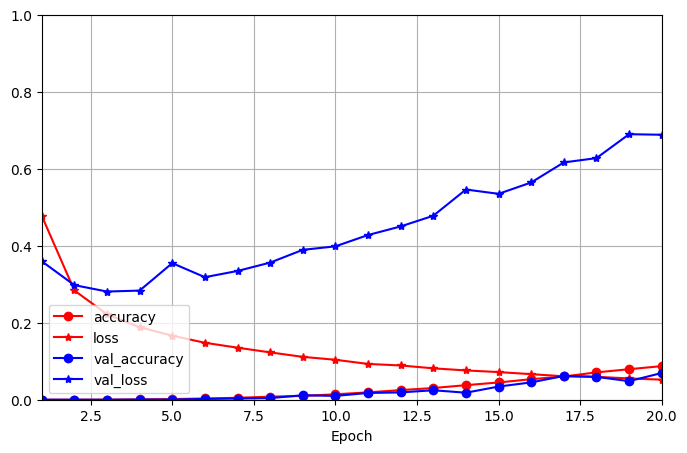

In [345]:
import matplotlib.pyplot as plt

def plot_learning_curves(history):
    plt.figure(figsize=(8, 5))
    for key, style in zip(history.history, ["r-o","r-*","b-o","b-*"]):
        epochs = np.array(history.epoch)
        plt.plot(epochs + 1, history.history[key], style, label=key)
    plt.xlabel("Epoch")
    plt.axis([1,len(history.history['loss']), 0., 1])
    plt.legend(loc="lower left")
    plt.grid()
plot_learning_curves(model_history)

3. You should notice that the model is overfitting

4. Initialize and compile the model again, but train for fewer epochs, so that the model does not overfit

    - **Batch Size** (Nauwkeurigheid van de koers): * Een kleine batch (zoals 8) zorgt voor veel kleine koerswijzigingen. De grafiek wordt "drukker", maar het model leert intensiever per epoch.
    
        Een grote batch zorgt voor stabiele, gemiddelde stappen. De grafiek oogt vloeiender.

    - **Epochs** (Duur van de studie):

        Te weinig: De lijnen blijven laag; het model heeft de data nog niet begrepen (Underfitting).

        Te veel: De trainingslijn wordt perfect, maar de validatielijn verslechtert; het model leert details uit het hoofd (Overfitting).

In [346]:
model_history = model.fit(
    x=X_train,
    y=y_train,
    epochs=15,
    batch_size=32,
    validation_data=(X_val, y_val)
)
plot_learning_curves(model_history)

Epoch 1/15
645/782 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1045 - loss: 0.0646

KeyboardInterrupt: 

### 2.6 Evaluate the Model
1. Use the `.evaluate` method to evaluate the model on the test set.


In [ ]:
evaluation = model.evaluate(
    x=X_test,
    y=y_test,
    verbose=2
)

469/469 - 1s - 3ms/step - accuracy: 0.2493 - loss: 1.7057


2. What is the performance of the model on the test set1?

In [ ]:
print(f"Accuracy: {evaluation[1]}\t Loss: {evaluation[0]}")

Accuracy: 0.24926666915416718	 Loss: 1.7056944370269775


## 3 MNIST with a Deep MLP
This exercise is based on exercise 10 from chapter 10 of the book “Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow” by Aurélien Géron. However, it contains more detailed instructions.

### 3.1  Load and Preprocess the MNIST dataset
1. Use `keras.datasets.mnist_load_data()` to easily download the MNIST dataset.


In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

2. Use the last `10 000` images of the training set as your validation set. This will give you `50 000` training images, `10 000` validation images, and `10 000` test images.

In [ ]:

#? Maken van val set (laatste 10 000)
x_val = x_train[50000:]
y_val = y_train[50000:]
#? Overschrijven van nieuwe training set
x_train = x_train[:50000]
y_train = y_train[:50000]

print(f"x_val shape {x_val.shape}, x_train shape {x_train.shape}")
print(f"y_val shape {y_val.shape}, y_train shape {y_train.shape}")


x_val shape (10000, 28, 28), x_train shape (50000, 28, 28)
y_val shape (10000,), y_train shape (50000,)


3. The pixel values are stored as integers (from 0 to 255). Convert them to floats between 0.0 and 1.0 (by dividing by 255.0).


In [ ]:
x_val = x_val/255.0
x_train = x_train/255.0


4. Reshape the tensors so that they have rank 2 instead of rank 3.

In [ ]:

#? 28 * 28 is gehardcodeerd, normaal zou je dit dynamisch doen
#? -1 betekent dat numpy zelf moet uitrekenen hoeveel rijen er moeten komen
#? 28 * 28 is de breedte van een plaatje

x_train = x_train.reshape(-1,28*28)
x_test = x_test.reshape(-1,28*28)
x_val = x_val.reshape(-1,28*28)

print("X_train.shape:", x_train.shape)
print("X_test.shape:", x_test.shape)
print("X_val.shape:", x_val.shape)

X_train.shape: (50000, 784)
X_test.shape: (10000, 784)
X_val.shape: (10000, 784)


### 3.2  Build a MLP
1. Use the Sequential API to build to build a model with two hidden layers and one output layer.


In [ ]:
x_train.shape
#* (50000, 784) -> Input shape (784,)

(50000, 784)

In [ ]:
model = keras.Sequential([keras.Input(shape=(784,))])

2. Use the `ReLU` activation function for the hidden layers (with 300 and 100 units each) and the appropriate activation function and number of units for the output layer, given that we are doing multiclass classification.


In [ ]:
np.unique((y_train))
#* array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)
#* 10 moelijke antwoorden, dus waarschijnlijke softmax

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
model.add(layers.Dense(units=300, activation="relu"))
model.add(layers.Dense(units=100, activation="relu"))
model.add(layers.Dense(units=10, activation="softmax"))


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 300)            │        90,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │         3,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,810 (1.25 MB)

 Trainable params: 328,810 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

3. Create a function `get_model()` that returns this model

In [ ]:
def get_model():
    return keras.Sequential([keras.Input(shape=(784,)),
                             layers.Dense(units=300, activation="relu"),
                             layers.Dense(units=100, activation="relu"),
                             layers.Dense(units=10, activation="softmax")
                             ])

model = get_model()

4. You should find that the model has `266 610` parameters when you ask for the `summary()`

In [ ]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

### 3.3 Compile the model
1. Create an `SGD` optimizer with a learning rate of 0.01.
2. Compile the model, using the appropriate loss function for multiclass classification, also taking into account that the labels are not one-hot encoded. Track the `accuracy` metric

In [ ]:
model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"], #! Moest "accuracy" gebruiken voor een reden
)

### 3.4 Train the Model
1. Use a batch size of 256
2. Train the model for a large number of epochs but use the `EarlyStopping` Callbackto stop training when the validation accuracy has not improved for 5 epochs.
3. Also use the `ModelCheckpoint` callback to save the model with the best validation loss.
4. Use the TensorBoard callback to log the training process.

In [ ]:

# ! https://keras.io/api/callbacks/early_stopping/
#* validation loss gaat bepalen of je bent aan het overfitten of niet
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5
)
#! https://keras.io/api/callbacks/tensorboard/
#* TensorBoard is een tool om je model te visualiseren
tensorboard_logging = keras.callbacks.TensorBoard()

#! https://keras.io/api/callbacks/model_checkpoint/
#* ModelCheckpoint slaat je model op tijdens het trainen
checkpoint_path = "mnist_model.h5"
model_checkpoint = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
)

In [ ]:
from keras import callbacks
model_history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=256,
    epochs=100,
    verbose="auto",
    callbacks=[early_stopping,model_checkpoint,tensorboard_logging],
    validation_data=(x_val, y_val),
)

Epoch 1/100
190/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9216 - loss: 0.2774

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9210 - loss: 0.2818 - val_accuracy: 0.9234 - val_loss: 0.2821
Epoch 2/100
186/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9192 - loss: 0.2848

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9208 - loss: 0.2831 - val_accuracy: 0.9190 - val_loss: 0.2906
Epoch 3/100
192/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9212 - loss: 0.2831

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9203 - loss: 0.2837 - val_accuracy: 0.9191 - val_loss: 0.2965
Epoch 4/100
194/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9209 - loss: 0.2787

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9190 - loss: 0.2863 - val_accuracy: 0.9249 - val_loss: 0.2781
Epoch 5/100
187/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9190 - loss: 0.2913

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9190 - loss: 0.2879 - val_accuracy: 0.9045 - val_loss: 0.3253
Epoch 6/100
187/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9162 - loss: 0.2954

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9185 - loss: 0.2896 - val_accuracy: 0.9016 - val_loss: 0.3450
Epoch 7/100
192/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9141 - loss: 0.3005

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9144 - loss: 0.3016 - val_accuracy: 0.9073 - val_loss: 0.3243
Epoch 8/100
188/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9163 - loss: 0.3000

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9095 - loss: 0.3248 - val_accuracy: 0.9158 - val_loss: 0.3028
Epoch 9/100
188/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9047 - loss: 0.3400

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9050 - loss: 0.3501 - val_accuracy: 0.9111 - val_loss: 0.3147


### 3.5 Evaluate the Model
1. Use the `evaluate` method to evaluate the model on the train, validation and test set.
2. Check that some of these results correspond to the output shown during training

In [ ]:
test_evaluation = model.evaluate(
    x=x_test,
    y=y_test,
    verbose=2
)
print(test_evaluation)
val_evaluation = model.evaluate(
    x=x_val,
    y=y_val,
    verbose=2
)
print(val_evaluation)


313/313 - 1s - 4ms/step - accuracy: 0.8848 - loss: 77.8798
[77.8797836303711, 0.8848000168800354]
313/313 - 1s - 3ms/step - accuracy: 0.9111 - loss: 0.3147
[0.3146860897541046, 0.9110999703407288]


### 3.6 Try Different Learning Rates and Batch Size
1. Try different learning rates (e.g. [0.01, 0.05, 0.1, 0.5]) and batch sizes (e.g. [64, 128, 256, 512]) and see how they affect the performance of the model.


In [ ]:
learning_rates = [0.01, 0.05, 0.1, 0.5]
batch_sizes = [64, 128, 256, 512]


for lr in learning_rates:
    for bs in batch_sizes:
        # * COMPILE
        model.compile(
            optimizer=keras.optimizers.SGD(learning_rate=lr),
            loss=keras.losses.SparseCategoricalCrossentropy(),
            metrics=["accuracy"])
        # * FIT
        model_history = model.fit(
            x=x_train,
            y=y_train,
            batch_size=256,
            epochs=100,
            verbose="auto",
            callbacks=[early_stopping, model_checkpoint, tensorboard_logging],
            validation_data=(x_val, y_val),
        )

Epoch 1/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9027 - loss: 0.3737

196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8950 - loss: 0.4276 - val_accuracy: 0.9021 - val_loss: 0.3594
Epoch 2/100
186/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8863 - loss: 0.4701

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8913 - loss: 0.4544 - val_accuracy: 0.8790 - val_loss: 0.4429
Epoch 3/100
194/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8735 - loss: 0.6085

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8745 - loss: 0.6162 - val_accuracy: 0.6997 - val_loss: 3.2214
Epoch 4/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8647 - loss: 0.7128

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8638 - loss: 0.7527 - val_accuracy: 0.8782 - val_loss: 0.6534
Epoch 5/100
187/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8604 - loss: 0.8144

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8579 - loss: 0.8315 - val_accuracy: 0.8995 - val_loss: 0.4635
Epoch 1/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8552 - loss: 0.9516

196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8417 - loss: 1.1391 - val_accuracy: 0.7739 - val_loss: 3.3206
Epoch 2/100
188/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8258 - loss: 1.4707

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8297 - loss: 1.3710 - val_accuracy: 0.7926 - val_loss: 1.7397
Epoch 3/100
189/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8364 - loss: 1.4164

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8272 - loss: 1.5932 - val_accuracy: 0.8179 - val_loss: 1.8251
Epoch 4/100
186/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8141 - loss: 1.9809

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8163 - loss: 1.9861 - val_accuracy: 0.7164 - val_loss: 3.8043
Epoch 5/100
188/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8214 - loss: 2.0901

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8207 - loss: 2.1548 - val_accuracy: 0.8565 - val_loss: 1.4336
Epoch 1/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8125 - loss: 2.6946

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8127 - loss: 2.6464 - val_accuracy: 0.5660 - val_loss: 26.9219
Epoch 2/100
188/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8163 - loss: 3.3122

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8227 - loss: 2.8383 - val_accuracy: 0.7536 - val_loss: 3.2612
Epoch 3/100
189/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8240 - loss: 2.8827

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8270 - loss: 2.8018 - val_accuracy: 0.7947 - val_loss: 3.0638
Epoch 4/100
187/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8151 - loss: 3.2932

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8228 - loss: 3.3214 - val_accuracy: 0.6544 - val_loss: 20.2537
Epoch 5/100
189/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8082 - loss: 4.4856

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8077 - loss: 4.3292 - val_accuracy: 0.8050 - val_loss: 3.2089
Epoch 1/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8244 - loss: 3.7312

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8207 - loss: 4.0163 - val_accuracy: 0.8494 - val_loss: 2.4860
Epoch 2/100
189/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8273 - loss: 4.1055

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8216 - loss: 4.5439 - val_accuracy: 0.8789 - val_loss: 2.3050
Epoch 3/100
189/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8210 - loss: 5.1715

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8130 - loss: 5.5331 - val_accuracy: 0.5818 - val_loss: 16.2992
Epoch 4/100
189/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8106 - loss: 6.1298

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8210 - loss: 5.6405 - val_accuracy: 0.8373 - val_loss: 3.9298
Epoch 5/100
186/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8113 - loss: 7.2922

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8214 - loss: 6.3800 - val_accuracy: 0.8409 - val_loss: 4.6950
Epoch 1/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6266 - loss: 153.1322

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7121 - loss: 78.6143 - val_accuracy: 0.6642 - val_loss: 205.9441
Epoch 2/100
187/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7299 - loss: 119.8319

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7338 - loss: 181.8309 - val_accuracy: 0.6642 - val_loss: 421.6024
Epoch 3/100
193/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5764 - loss: nan

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3127 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 4/100
186/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: nan

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 5/100
188/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: nan

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 1/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: nan

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 2/100
187/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: nan

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 3/100
194/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: nan

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 4/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: nan

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 5/100
186/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: nan

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 1/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: nan

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 2/100
188/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: nan

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 3/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: nan

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 4/100
188/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: nan

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 5/100
186/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: nan

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 1/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: nan

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 2/100
193/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: nan

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 3/100
193/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: nan

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 4/100
188/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: nan

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 5/100
187/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: nan

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 1/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: nan

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 2/100
187/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: nan

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 3/100
186/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: nan

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 4/100
187/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: nan

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 5/100
188/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: nan

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 1/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: nan

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 2/100
188/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: nan

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 3/100
189/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: nan

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 4/100
187/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: nan

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 5/100
186/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: nan

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 1/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: nan

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 2/100
187/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: nan

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 3/100
187/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: nan

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 4/100
187/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: nan

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 5/100
189/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: nan

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 1/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: nan

196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 2/100
186/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: nan

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 3/100
186/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: nan

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 4/100
186/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: nan

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 5/100
187/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: nan

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 1/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: nan

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 2/100
188/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: nan

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 3/100
187/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: nan

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 4/100
187/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: nan

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 5/100
195/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: nan

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 1/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: nan

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 2/100
188/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: nan

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 3/100
187/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: nan

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 4/100
195/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: nan

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 5/100
186/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: nan

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 1/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: nan

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 2/100
193/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: nan

196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 3/100
186/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: nan

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 4/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: nan

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 5/100
187/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: nan

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 1/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: nan

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 2/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: nan

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 3/100
188/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: nan

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 4/100
187/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: nan

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 5/100
187/196 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: nan

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan


2. Check the learning curves in TensorBoard to inspect how the training pro-cess went.
3. Save all the different models and try to find the best one. Evaluate its performance on the test set.

In [ ]:
%load_ext tensorboard
%tensorboard --logdir="logs/"

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 714), started 0:06:27 ago. (Use '!kill 714' to kill it.)

## 4. Predicting Wine Quality with a Deep MLP
In this exercise we build a deep MLP to predict the wine quality. We will viewthis as a regression problem

### 4.1  Load the Data
1. Download the wine quality dataset from https://archive.ics.uci.edu/dataset/186/wine+qualityusingkeras.utils.get_file().


In [347]:
URL = "https://archive.ics.uci.edu/static/public/186/wine+quality.zip"
wine_quality_dataset = keras.utils.get_file(
    origin=URL,
    cache_subdir="datasets",
    fname="wine_quality.zip",
    cache_dir=".",
    extract=True,
)
wine_quality_dataset

'./datasets/wine_quality_extracted'

2. Load wine quality-white.csv into a Pandas dataframe. We are going to use the 11 features to predict the wine quality (which we view as a real number).


In [348]:
import pandas as pd

winequality_red = pd.read_csv("./datasets/wine_quality_extracted/winequality-red.csv",sep=";")
winequality_white = pd.read_csv("./datasets/wine_quality_extracted/winequality-red.csv",sep=";")

#? Alle rijen, alle kolomen BEHALVE laatste
x = winequality_white.iloc[:, :-1]
#? Alle rijen, alleen laaste kolom
y = winequality_white.iloc[:, -1]

3. What is the distribution of the target variabele?

In [349]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


4. Create the tensor of features X, and the tensor of targets 𝑦.


In [350]:
x = keras.ops.convert_to_tensor(x,dtype=np.float32)
y = keras.ops.convert_to_tensor(y,dtype=np.int32)
print("x shape: ", x.shape)
print("y shape: ", y.shape)

x shape:  (1599, 11)
y shape:  (1599,)


5. Use 20% of the total dataset as test set. Use the `train_test_split`-method from `sklearn`

In [351]:
from sklearn.model_selection import train_test_split

#* Tensors omzetten naar array,
#* want train_test_split verwacht een array
x = np.array(x)
y = np.array(y)

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, random_state=42)

6. Use 20% of the remaining data as validation set. Use the `train_test_split`-method from sklearn.

In [352]:
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.20, random_state=42)

7. What is the shape of training set, validation set and test set?

In [353]:
print("x_train.shape ", x_train.shape)
print("x_val.shape ", x_val.shape)
print("y_train.shape ", y_train.shape)
print("y_val.shape ", y_val.shape)


x_train.shape  (1023, 11)
x_val.shape  (256, 11)
y_train.shape  (1023,)
y_val.shape  (256,)


### 4.2  Build a MLP
1. Define a `Normalization` layer that makes sure that the mean and standard deviation of each feature is close to zero and one respectively

In [354]:
norm_layer = keras.layers.Normalization(axis=-1)

2. Make sure to adapt this layer only on the training data, to ensure that no data leakage occurs

In [355]:
norm_layer.adapt(x_train)

3. Use the `Sequential` API to build a model that starts with the normalization layer you just defined, followed by three hidden layers and one output layer. Use the ReLU activation function for the hidden layers (with 50 units each) and the appropriate activation function and number of units for the output layer, given that we are doing regression

In [356]:
model = keras.Sequential()
model.add(norm_layer)
model.add(layers.Dense(units=50, activation="relu"))
model.add(layers.Dense(units=50, activation="relu"))
model.add(layers.Dense(units=50, activation="relu"))
model.add(layers.Dense(units=11, activation="softmax"))

4. Create a function `get_model(normalization_layer)` that returns this model. Note how we pass in the normalization layer as an argument to this function

In [357]:
def get_model(normalization_layer):
    return keras.Sequential([
        normalization_layer,
        layers.Dense(units=50, activation="relu"),
        layers.Dense(units=50, activation="relu"),
        layers.Dense(units=50, activation="relu"),
        layers.Dense(units=1)])

5. Ask for the `summary()` of the returned model. The model has `5 774` parameters in total and it has 23 non-trainable parameters

In [358]:
model = get_model(norm_layer)
model.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_10                │ (1023, 11)             │            23 │
│ (Normalization)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23 (96.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23 (96.00 B)

6. Make sure that you understand where these numbers come from
    * Het Gemiddelde (Mean): 11 kolommen $\rightarrow$ 11 getallen.
    * De Variantie (Variance): 11 kolommen $\rightarrow$ 11 getallen.
    * De Teller (Count): Een extra getal dat bijhoudt hoeveel samples de laag heeft gezien tijdens de .adapt() stap om de statistieken correct te berekenen $\rightarrow$ 1 getal.

    $11 (\text{mean}) + 11 (\text{variance}) + 1 (\text{count}) = 23 \text{ parameters}$

### 4.3  Compile the Model
1. Create an Adam optimizer with a learning rate of 1/1000.
2. Compile the model using the mean absolute error as the loss function

In [364]:
model.compile(
    optimizer=optimizers.Adam(learning_rate=1/1000),
    loss="mean_absolute_error"
)

### 4.4 Train the Model
1. Train the model for 20 epochs, using a batch size of 32.
2. Use the `history` object returned by the `fit()` method to plot the learning curves. Is the model overfitting?

In [365]:
def plot_learning_curves(history):
    plt.figure(figsize=(15, 15))
    for key, style in zip(history.history, ["r-o","r-*","b-o","b-*"]):
        epochs = np.array(history.epoch)
        plt.plot(epochs + 1, history.history[key], style, label=key)
    plt.xlabel("Epoch")
    plt.axis([1,len(history.history['loss']), 0., 1])
    plt.legend(loc="lower left")
    plt.grid()

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.8027 - val_loss: 0.6651
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6291 - val_loss: 0.5498
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5838 - val_loss: 0.7959
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6267 - val_loss: 0.5783
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6760 - val_loss: 0.7609
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5954 - val_loss: 0.4898
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7017 - val_loss: 0.5456
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7538 - val_loss: 1.1642
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0250 - val_loss: 0.8856
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7313 - val_loss: 0.5049
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6854 - val_loss: 0.9185
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9685 - val_l

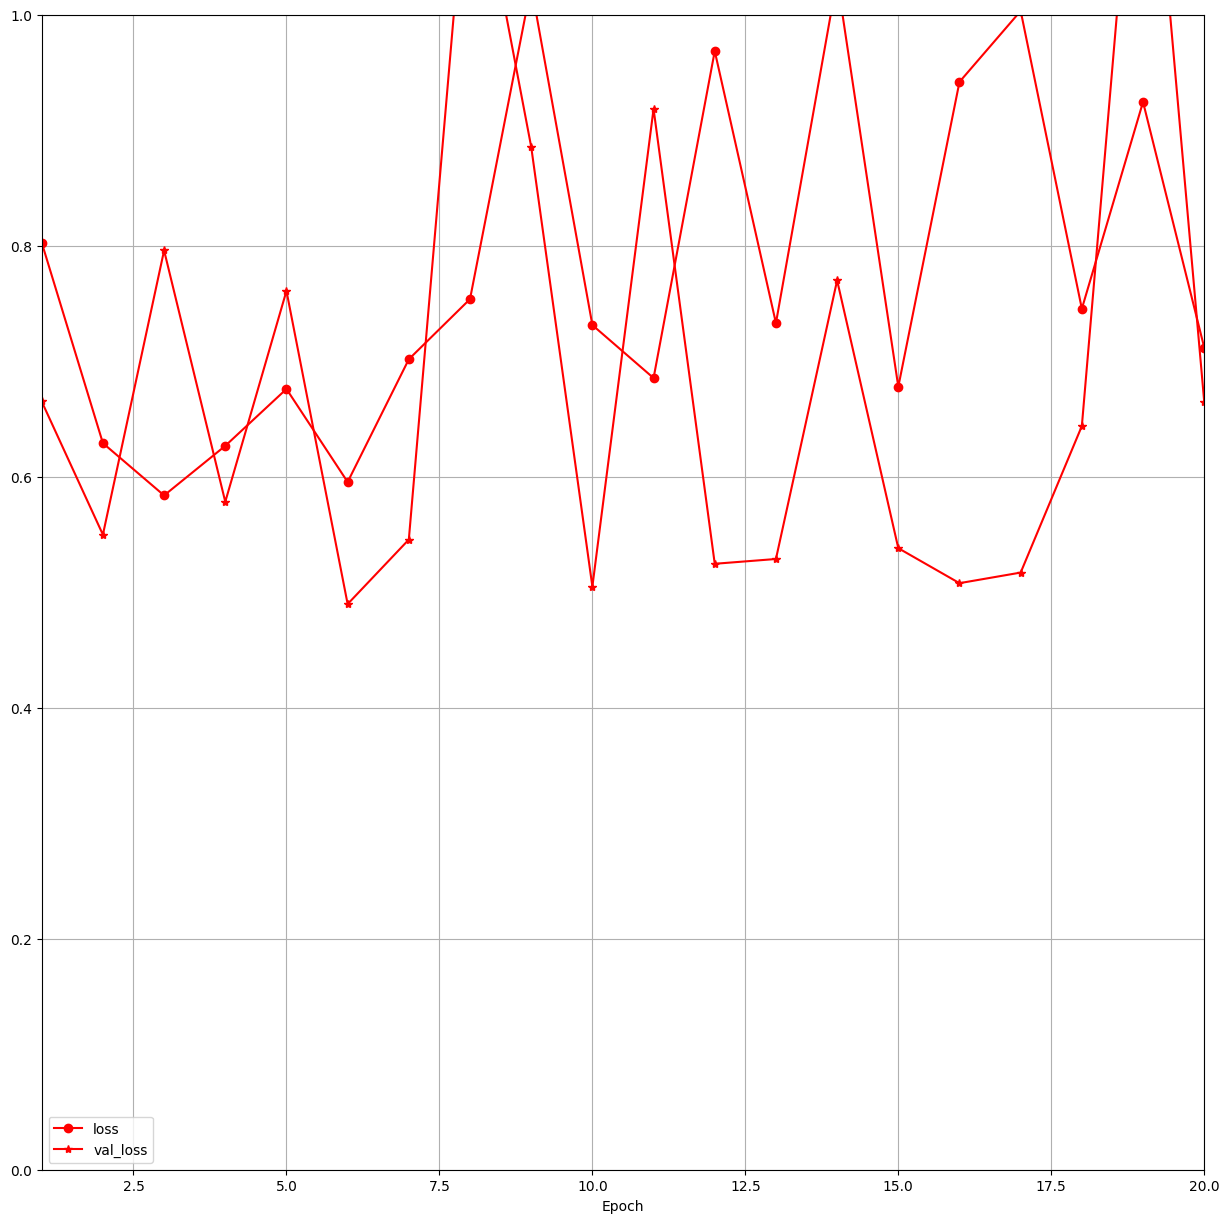

In [366]:
model_history = model.fit(
    x=x_train,
    y=y_train,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val)
)
plot_learning_curves(model_history)

## 4.5  Evaluate the Model
1. Use the evaluate() method to evaluate the model on the test set.
2. What is the mean absolute error on the test set?
3. Calculate the mean absolute error for each of the different qualities in the test set. Does the model perform differently according to the quality of the wine?

In [367]:
model.evaluate(
    x=x_test,
    y=y_test,
    verbose=2
)

10/10 - 0s - 4ms/step - loss: 0.7213


0.7213404774665833

In [368]:
test_mae = results if isinstance(results, float) else results[0]
print(f"De Mean Absolute Error op de testset is: {test_mae:.4f}")

De Mean Absolute Error op de testset is: 9.4634
